## Observations and Insights

## Dependencies and starter code

In [122]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = ".\data\Mouse_metadata.csv"
study_results = ".\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

combined_df = pd.concat([mouse_metadata, study_results], axis=1, join='outer')

combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [123]:
combined_df = combined_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume","Weight (g)":"Weight"})


In [124]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

average_tumor_region = combined_df.groupby(['Drug Regimen']).mean()['Tumor Volume']
median_tumor_region = combined_df.groupby(['Drug Regimen']).median()['Tumor Volume']
var_scipy = combined_df.groupby(['Drug Regimen']).var()['Tumor Volume']
std_scipy = combined_df.groupby(['Drug Regimen']).std()['Tumor Volume']
sem_scipy = combined_df.groupby(['Drug Regimen']).sem()['Tumor Volume']

summary_df = pd.DataFrame({"Average Tumor Size": average_tumor_region, 
                           "Median Tumor Size": median_tumor_region,
                          "Variance": var_scipy,
                          "Standard Deviation": std_scipy,
                          "SEM": sem_scipy
                          })

summary_df = summary_df.round({'Average Tumor Size': 2, 'Median Tumor Size': 2,"Variance": 2, "Standard Deviation": 2, "SEM": 2})

summary_df


,Average Tumor Size,Median Tumor Size,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

In [125]:
drug_type = combined_df['Drug Regimen'].value_counts()
drug = combined_df['Drug Regimen'].unique()

Text(0, 0.5, 'Number of Tests')

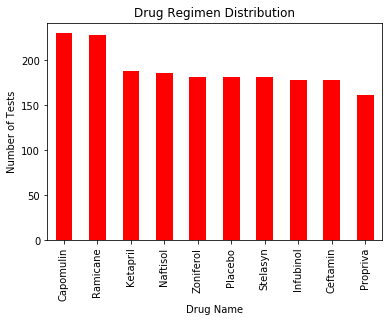

In [126]:
# Generate a bar plot showing number of data points for each treatment regimen using panda

drug_chart = drug_type.plot(kind="bar", facecolor="red")

drug_chart.set_title("Drug Regimen Distribution")
drug_chart.set_xlabel("Drug Name")
drug_chart.set_ylabel("Number of Tests")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

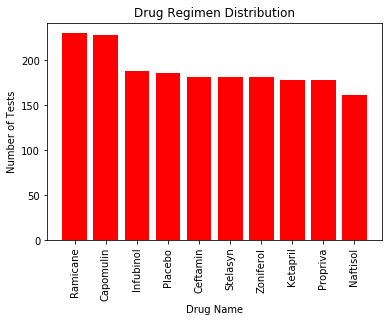

In [127]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(drug, drug_type, color='r')

plt.title("Drug Regimen Distribution")
plt.ylabel("Number of Tests")
plt.xlabel("Drug Name")
plt.xticks(rotation=90)


## Pie plots

In [128]:
gender_mice = combined_df['Sex'].value_counts()

gender_mice

Male      958
Female    935
Name: Sex, dtype: int64

In [129]:
gender = ("Male", "Female")
members = gender_mice
colors = ["yellowgreen", "red"]

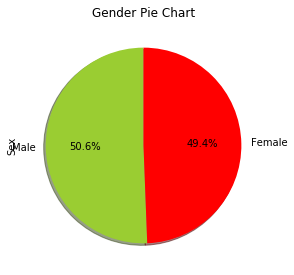

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
 
gender_mice.plot.pie(y='members', colors=colors, 
                     labels=gender, 
                     autopct="%1.1f%%", 
                     figsize=(4.5, 4.5), 
                     shadow=True,
                     startangle=90,
                    title="Gender Pie Chart")



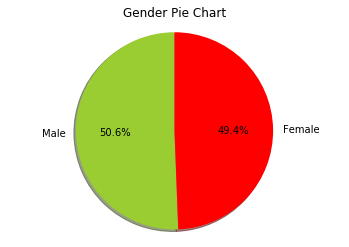

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title("Gender Pie Chart")
plt.pie(gender_mice, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.


In [132]:
max_mouse_id = combined_df.groupby(['Mouse ID']).max()

max_mouse_id = max_mouse_id.reset_index()

mouse_df = max_mouse_id[['Mouse ID','Timepoint']].merge(combined_df,on=['Mouse ID','Timepoint'],how="left")


In [165]:
capomulin_score = mouse_df.loc[mouse_df['Drug Regimen']=='Capomulin']['Tumor Volume']

infubinol_score = mouse_df.loc[mouse_df['Drug Regimen']=='Infubinol']['Tumor Volume']

ramicane_score = mouse_df.loc[mouse_df['Drug Regimen']=='Ramicane']['Tumor Volume']

propriva_score = mouse_df.loc[mouse_df['Drug Regimen']=='Propriva']['Tumor Volume']


In [134]:
c_quartiles = capomulin_score.quantile([.25,.5,.75])
c_lowerq = c_quartiles[0.25]
c_upperq = c_quartiles[0.75]
c_iqr = c_upperq-c_lowerq

c_lower_bound = c_lowerq - (1.5*c_iqr)
c_upper_bound = c_upperq + (1.5*c_iqr)

c_upper_bound = round(c_upper_bound,2)
c_lower_bound = round(c_lower_bound,2)

print(f"Values below {c_lower_bound} could be outliers.")
print(f"Values above {c_upper_bound} could be outliers.")

Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [135]:
i_quartiles = infubinol_score.quantile([.25,.5,.75])
i_lowerq = i_quartiles[0.25]
i_upperq = i_quartiles[0.75]
i_iqr = i_upperq-i_lowerq

i_lower_bound = i_lowerq - (1.5*c_iqr)
i_upper_bound = i_upperq + (1.5*c_iqr)

i_upper_bound = round(i_upper_bound,2)
i_lower_bound = round(i_lower_bound,2)

print(f"Values below {i_lower_bound} could be outliers.")
print(f"Values above {i_upper_bound} could be outliers.")

Values below 42.38 could be outliers.
Values above 77.2 could be outliers.


In [145]:
r_quartiles = ramicane_score.quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq

r_lower_bound = r_lowerq - (1.5*c_iqr)
r_upper_bound = r_upperq + (1.5*c_iqr)

r_upper_bound = round(r_upper_bound,2)
r_lower_bound = round(r_lower_bound,2)

print(f"Values below {r_lower_bound} could be outliers.")
print(f"Values above {r_upper_bound} could be outliers.")

Values below 19.89 could be outliers.
Values above 52.33 could be outliers.


In [146]:
p_quartiles = propriva_score.quantile([.25,.5,.75])
p_lowerq = p_quartiles[0.25]
p_upperq = p_quartiles[0.75]
p_iqr = p_upperq-p_lowerq

p_lower_bound = p_lowerq - (1.5*c_iqr)
p_upper_bound = p_upperq + (1.5*c_iqr)

p_upper_bound = round(p_upper_bound,2)
p_lower_bound = round(p_lower_bound,2)

print(f"Values below {p_lower_bound} could be outliers.")
print(f"Values above {p_upper_bound} could be outliers.")

Values below 37.45 could be outliers.
Values above 74.24 could be outliers.


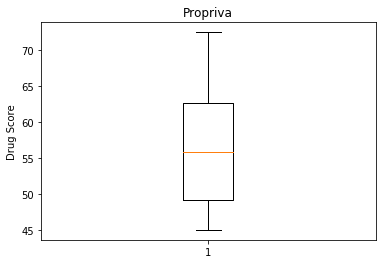

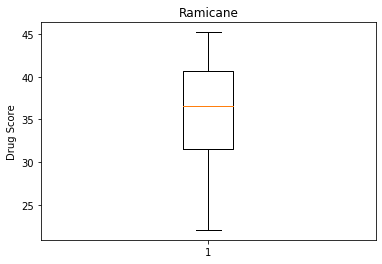

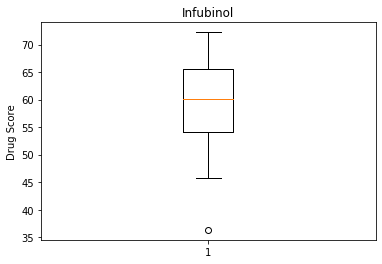

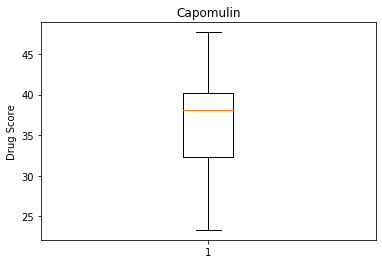

In [167]:

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()

ax1.set_title('Propriva')
ax1.set_ylabel('Drug Score')
ax2.set_title('Ramicane')
ax2.set_ylabel('Drug Score')
ax3.set_title('Infubinol')
ax3.set_ylabel('Drug Score')
ax4.set_title('Capomulin')
ax4.set_ylabel('Drug Score')


ax1.boxplot(propriva_score)
ax2.boxplot(ramicane_score)
ax3.boxplot(infubinol_score)
ax4.boxplot(capomulin_score)

plt.show()


## Line and scatter plots

In [168]:
capomulin_data = combined_df.loc[combined_df['Drug Regimen']=='Capomulin']

capomulin_mouse = capomulin_data.loc[capomulin_data['Mouse ID']=='s185']

capomulin_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0, 0.5, 'Tumor Volume')

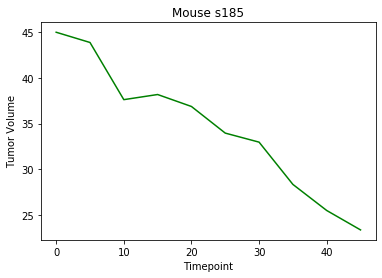

In [193]:
mouse_s185_line = plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume'], label="Mouse ID",
                         color="green",) 


plt.title('Mouse s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



In [202]:
capomulin_data = combined_df.loc[combined_df['Drug Regimen']=='Capomulin']

capomulin_data = capomulin_data.reset_index()

capomulin_df = capomulin_data.groupby(['Mouse ID']).mean()

capomulin_df.head()


,index,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
Mouse ID,,,,,,
b128,304.5,9.0,22.0,22.5,41.963636,0.7
b742,294.5,7.0,21.0,22.5,40.083699,0.0
f966,62.0,16.0,17.0,10.0,36.505973,0.0
g288,239.5,3.0,19.0,22.5,41.990097,0.8
g316,355.5,22.0,22.0,22.5,44.613344,1.0


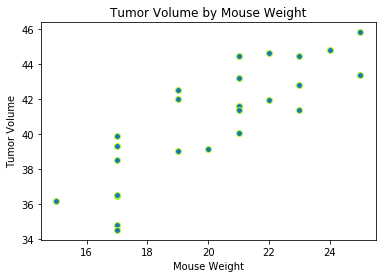

In [207]:
plt.scatter(capomulin_df.iloc[:,2], capomulin_df.iloc[:,4], edgecolor='greenyellow')
plt.title('Tumor Volume by Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen




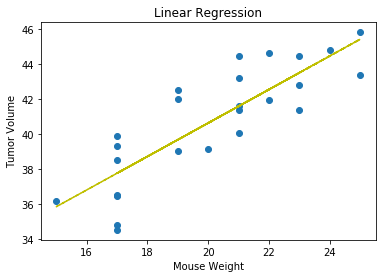

In [219]:
x_values = capomulin_df['Weight']
y_values = capomulin_df['Tumor Volume']


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"y--")
plt.title("Linear Regression")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()


In [229]:

correlation = st.pearsonr(capomulin_df['Weight'], capomulin_df['Tumor Volume'])

correlation = round(correlation[0],2)

print(f"The correlation between both factors is {correlation}")        



The correlation between both factors is 0.84


In [230]:
if correlation >= .8:
    
    print(f"nice correlation dude")

nice correlation dude
